In [15]:
from __future__ import print_function 
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib as mpl 
import datetime as dt

mpl.rcParams['savefig.dpi'] = 100 
mpl.rcParams['figure.dpi'] = 100
mpl.rcParams.update({'font.size': 40})

%config InlineBackend.figure_format = 'retina' 
%matplotlib inline

import matplotlib.dates as mdates

In [16]:
with open("../results/trips-time-series.txt") as f:
    lines = f.readlines()

In [17]:
tuples = [line.strip() for line in lines]

In [18]:
taxi_dates = [x[1:].split(",")[0][1:-1] for x in tuples]
rides = [float(x[:-1].split(",")[1]) for x in tuples]

In [19]:
x = [dt.datetime.strptime(d, '%Y/%m').date() for d in taxi_dates]
y = range(len(x))

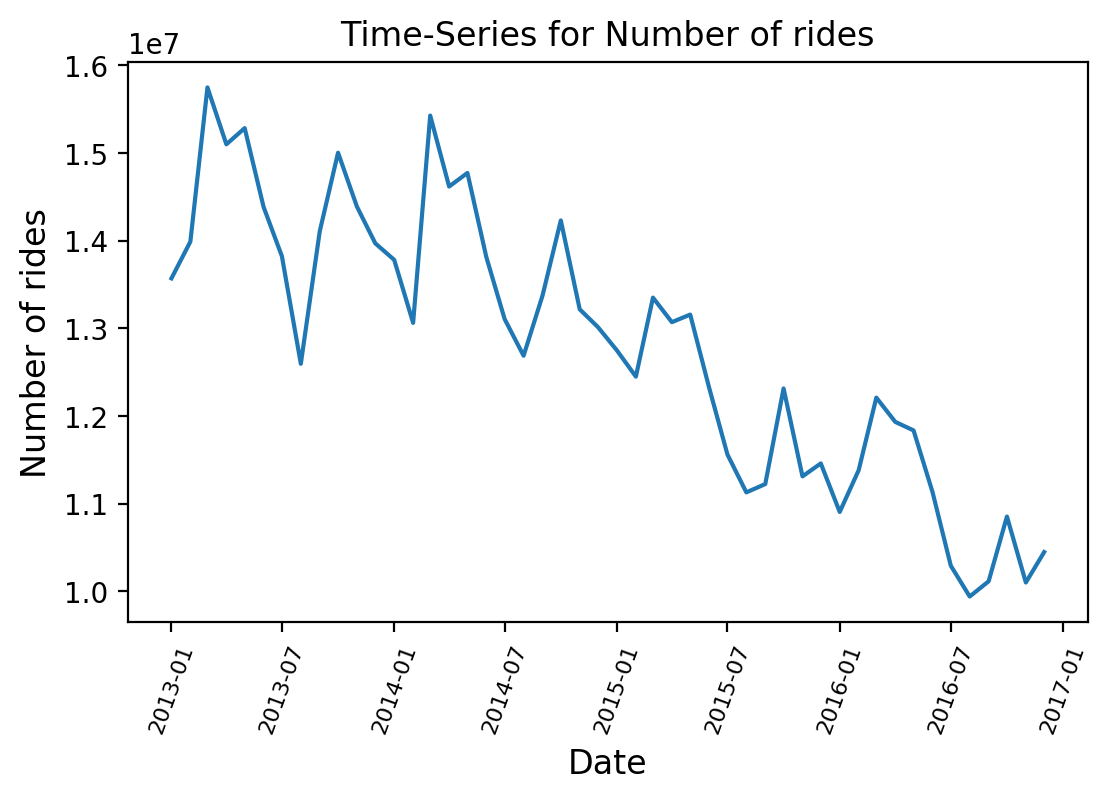

In [29]:
fig = mpl.pyplot.gcf()

ax1 = fig.add_axes((0.1, 0.2, 0.8, 0.7))
ax1.set_title("Time-Series for Number of rides")

plt.plot(x, rides)

plt.setp(ax1.xaxis.get_majorticklabels(), rotation=70 )

plt.xlabel("Date", fontsize=12)
plt.ylabel("Number of rides", fontsize=12)

plt.savefig("time-series-rides.jpg",bbox_inches="tight")